# Used Toyota Camry Price Analysis - Boston

ZIP code 02134 is located in northern Massachusetts and covers a slightly less than average land area compared to other ZIP codes in the United States. It also has an extremely large population density. The number of young adults is extremely large while the number of people in their late 20s to early 40s is extremely large. There are also an extremely large number of single adults and an extremely small number of families. The population density is 16,212 people per square mile. The median household income of $37,820 is compared to the rest of the country.

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
#Create empty lists to store the data we are about to collect from the website
#We would like to collect the names of the cars, the mileage, the price, the rating, the number of reviews the car received

car_name = []
car_mileage = []
car_price = []
car_rating = []
car_ratingcount = []   

In [3]:
#We need to create a variable to stor the url of the website, I'm calling this variable website_url. We then need to send a request to the website
#and scrape multiple pages

for i in range(1,6):
    website_url ="https://www.cars.com/shopping/results/?dealer_id=&keyword=&list_price_max=&list_price_min=&makes[]=toyota&maximum_distance=20&mileage_max=&models[]=toyota-camry&monthly_payment=&page=" + str(i) + "&page_size=20&sort=best_match_desc&stock_type=used&trims[]=toyota-camry-le&year_max=&year_min=&zip=02134"
    
    #make request to the website
    web_request = requests.get(website_url)
    
    # Create an object to store the html elements of the request
    soup = BeautifulSoup(web_request.content,'html.parser')
    
    # Create a list that contains the results of the web page
    results_list = soup.find_all('div', {'class':'vehicle-card'})
    
    for i in results_list:
    
        #get the names of the cars. If the name of the car is not present, append 'n/a' to the list
        try:
            car_name.append(i.find('h2').get_text())
        except:
            car_name.append('n/a')

        #get the mileage of the cars
        try:
            car_mileage.append(i.find('div', {'class' : 'mileage'}).get_text())
        except:
            car_mileage.append('n/a')

        #get the price of the car
        try:
            car_price.append(i.find('span', {'class' : 'primary-price'}).get_text())
        except:
            car_price.append('n/a')

        #get the rating
        try:
            car_rating.append(i.find('span', {'class': 'sds-rating__count'}).get_text())
        except:
            car_rating.append('n/a')

        #get the number of reviews
        try:
            car_ratingcount.append(i.find('span', {'class': 'sds-rating__link'}).get_text())
        except:
            car_ratingcount.append('n/a')

In [4]:
# Create a DataFrame

car_info = pd.DataFrame({'Name': car_name, 'Mileage': car_mileage, 'Price': car_price, 'Rating': car_rating, 'Reviews': car_ratingcount})

In [5]:
#print the DataFrame
car_info

,Name,Mileage,Price,Rating,Reviews
0,2020 Toyota Camry LE,"34,878 mi.","$22,000",4.4,(916 reviews)
1,2007 Toyota Camry LE,"179,000 mi.","$3,200",n/a,n/a
2,2020 Toyota Camry LE,"46,915 mi.","$23,864",4.9,"(1,190 reviews)"
3,2011 Toyota Camry LE,"151,972 mi.","$7,693",3.6,(23 reviews)
4,2014 Toyota Camry LE,"111,955 mi.","$13,377",4.8,"(1,272 reviews)"
...,...,...,...,...,...
94,2022 Toyota Camry LE,"43,015 mi.","$24,500",4.4,(916 reviews)
95,2020 Toyota Camry LE,"93,310 mi.","$20,299",n/a,n/a
96,2020 Toyota Camry LE,"145,743 mi.","$18,619",n/a,n/a
97,2016 Toyota Camry LE,"78,000 mi.","$17,995",n/a,n/a


In [6]:
#Let's clean the data frame

#The first thing we should do is to edit the Reviews column

car_info['Reviews'] = car_info['Reviews'].apply(lambda x:x.strip('reviews)').strip('(')) #remove the word reviews and the parentheses
car_info['Rating'] = car_info['Rating'].apply(lambda x:x.replace('n/a', '0')) #remove 'n/a'
car_info['Reviews'] = car_info['Reviews'].apply(lambda x:x.replace('n/a', '0')) 
car_info['Mileage'] = car_info['Mileage'].apply(lambda x:x.replace('mi.', '')) #remove 'mi.' from the mileage column
car_info['Price'] = car_info['Price'].apply(lambda x:x.replace('$', '')) # remove the $ from the Price column
car_info['Price'] = car_info['Price'].apply(lambda x:x.replace(',', '')) #remove the ',' from the Price column
car_info['Mileage'] = car_info['Mileage'].apply(lambda x:x.replace(',', '')) #remove the ',' from the Mileage column
car_info['Reviews'] = car_info['Reviews'].apply(lambda x:x.replace(',', '')) #remove the ',' from the Reviews column
car_info['Price'] = car_info['Price'].apply(lambda x:x.replace('Not Priced', '0')) #there's one car where the value is 'not priced', this should be converted to a number

In [7]:
car_info

,Name,Mileage,Price,Rating,Reviews
0,2020 Toyota Camry LE,34878,22000,4.4,916
1,2007 Toyota Camry LE,179000,3200,0,0
2,2020 Toyota Camry LE,46915,23864,4.9,1190
3,2011 Toyota Camry LE,151972,7693,3.6,23
4,2014 Toyota Camry LE,111955,13377,4.8,1272
...,...,...,...,...,...
94,2022 Toyota Camry LE,43015,24500,4.4,916
95,2020 Toyota Camry LE,93310,20299,0,0
96,2020 Toyota Camry LE,145743,18619,0,0
97,2016 Toyota Camry LE,78000,17995,0,0


In [8]:
car_info = car_info.drop_duplicates()
car_info

,Name,Mileage,Price,Rating,Reviews
0,2020 Toyota Camry LE,34878,22000,4.4,916
1,2007 Toyota Camry LE,179000,3200,0,0
2,2020 Toyota Camry LE,46915,23864,4.9,1190
3,2011 Toyota Camry LE,151972,7693,3.6,23
4,2014 Toyota Camry LE,111955,13377,4.8,1272
5,2013 Toyota Camry LE,103198,13490,4.9,1629
6,2017 Toyota Camry LE,66517,19900,4.7,741
7,2020 Toyota Camry LE,38364,23504,0,92
8,2018 Toyota Camry LE,83780,19824,2.4,441
9,2004 Toyota Camry LE,119413,7990,0,21


In [9]:
#The Name column has a lot of important data on the Year, Company, Vehicle make and model

car_info[["Year", "Company", "Make", "Model"]] = car_info["Name"].str.split(" ", expand=True)

/Users/hsinhu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [10]:
car_info

,Name,Mileage,Price,Rating,Reviews,Year,Company,Make,Model
0,2020 Toyota Camry LE,34878,22000,4.4,916,2020,Toyota,Camry,LE
1,2007 Toyota Camry LE,179000,3200,0,0,2007,Toyota,Camry,LE
2,2020 Toyota Camry LE,46915,23864,4.9,1190,2020,Toyota,Camry,LE
3,2011 Toyota Camry LE,151972,7693,3.6,23,2011,Toyota,Camry,LE
4,2014 Toyota Camry LE,111955,13377,4.8,1272,2014,Toyota,Camry,LE
5,2013 Toyota Camry LE,103198,13490,4.9,1629,2013,Toyota,Camry,LE
6,2017 Toyota Camry LE,66517,19900,4.7,741,2017,Toyota,Camry,LE
7,2020 Toyota Camry LE,38364,23504,0,92,2020,Toyota,Camry,LE
8,2018 Toyota Camry LE,83780,19824,2.4,441,2018,Toyota,Camry,LE
9,2004 Toyota Camry LE,119413,7990,0,21,2004,Toyota,Camry,LE


In [11]:
# Drop the column Name and its no longer needed
car_info = car_info.drop(["Name"], axis = 1)

In [12]:
car_info

,Mileage,Price,Rating,Reviews,Year,Company,Make,Model
0,34878,22000,4.4,916,2020,Toyota,Camry,LE
1,179000,3200,0,0,2007,Toyota,Camry,LE
2,46915,23864,4.9,1190,2020,Toyota,Camry,LE
3,151972,7693,3.6,23,2011,Toyota,Camry,LE
4,111955,13377,4.8,1272,2014,Toyota,Camry,LE
5,103198,13490,4.9,1629,2013,Toyota,Camry,LE
6,66517,19900,4.7,741,2017,Toyota,Camry,LE
7,38364,23504,0,92,2020,Toyota,Camry,LE
8,83780,19824,2.4,441,2018,Toyota,Camry,LE
9,119413,7990,0,21,2004,Toyota,Camry,LE


In [13]:
# I would like to change the position of the columns
car_info = car_info[['Company', 'Rating', 'Reviews', 'Year', 'Price', 'Model', 'Make', 'Mileage']]
car_info

,Company,Rating,Reviews,Year,Price,Model,Make,Mileage
0,Toyota,4.4,916,2020,22000,LE,Camry,34878
1,Toyota,0,0,2007,3200,LE,Camry,179000
2,Toyota,4.9,1190,2020,23864,LE,Camry,46915
3,Toyota,3.6,23,2011,7693,LE,Camry,151972
4,Toyota,4.8,1272,2014,13377,LE,Camry,111955
5,Toyota,4.9,1629,2013,13490,LE,Camry,103198
6,Toyota,4.7,741,2017,19900,LE,Camry,66517
7,Toyota,0,92,2020,23504,LE,Camry,38364
8,Toyota,2.4,441,2018,19824,LE,Camry,83780
9,Toyota,0,21,2004,7990,LE,Camry,119413


In [14]:
#You can export the DataFrame to excel if you choose to proceed with excel
car_info.to_excel('multiple_pages.xlsx', index = False)

In [15]:
#You can export the DataFrame to a csv file if needed
car_info.to_csv('multiple_pages.csv', index = False)

In [16]:
#Let's determine the datatypes for each column within our car_info DataFrame
car_info.dtypes

Company    object
Rating     object
Reviews    object
Year       object
Price      object
Model      object
Make       object
Mileage    object
dtype: object

In [17]:
#All of the columns are listed as objects. We need to change the datatypes for at least some of these columns

#Year should be converted to int
car_info["Year"] = car_info["Year"].astype(int)

In [18]:
car_info["Price"] = car_info["Price"].astype(float)

In [19]:
car_info["Mileage"] = car_info["Mileage"].astype(float)

In [20]:
car_info["Rating"] = car_info["Rating"].astype(float)

In [21]:
car_info["Reviews"] = car_info["Reviews"].astype(int)

In [22]:
car_info.dtypes

Company     object
Rating     float64
Reviews      int64
Year         int64
Price      float64
Model       object
Make        object
Mileage    float64
dtype: object

In [23]:
car_info

,Company,Rating,Reviews,Year,Price,Model,Make,Mileage
0,Toyota,4.4,916,2020,22000.0,LE,Camry,34878.0
1,Toyota,0.0,0,2007,3200.0,LE,Camry,179000.0
2,Toyota,4.9,1190,2020,23864.0,LE,Camry,46915.0
3,Toyota,3.6,23,2011,7693.0,LE,Camry,151972.0
4,Toyota,4.8,1272,2014,13377.0,LE,Camry,111955.0
5,Toyota,4.9,1629,2013,13490.0,LE,Camry,103198.0
6,Toyota,4.7,741,2017,19900.0,LE,Camry,66517.0
7,Toyota,0.0,92,2020,23504.0,LE,Camry,38364.0
8,Toyota,2.4,441,2018,19824.0,LE,Camry,83780.0
9,Toyota,0.0,21,2004,7990.0,LE,Camry,119413.0


In [24]:
#create a new column called Age (Current year - Year)
import datetime

current_year = datetime.datetime.now().year
car_info['Age'] = current_year - car_info['Year']

In [25]:
#average price
average_price = car_info['Price'].mean()
print("Average Price:", average_price)

Average Price: 19334.120689655174


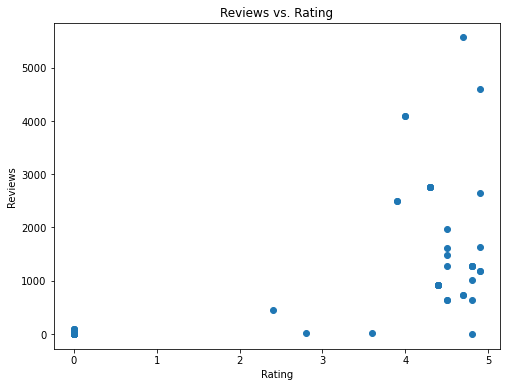

In [26]:
#visualize the relationship between Reviews and rating
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(car_info['Rating'], car_info['Reviews'])
plt.title('Reviews vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.show()

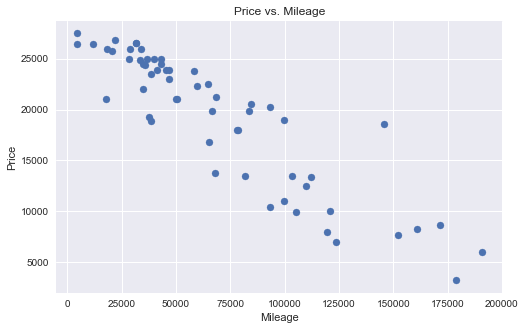

In [27]:
#visualize the relationship between price and mileage
import matplotlib.pyplot as plt

# Set the plot style
plt.style.use('seaborn') 

plt.figure(figsize=(8, 5))
plt.scatter(car_info['Mileage'], car_info['Price'])
plt.title('Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [28]:
correlation_matrix = car_info[['Rating', 'Reviews', 'Price', 'Mileage', 'Age']].corr()
correlation_matrix

,Rating,Reviews,Price,Mileage,Age
Rating,1.000000,0.602656,0.397650,-0.401008,-0.332180
Reviews,0.602656,1.000000,0.244678,-0.248004,-0.188513
Price,0.397650,0.244678,1.000000,-0.899473,-0.911701
Mileage,-0.401008,-0.248004,-0.899473,1.000000,0.774080
Age,-0.332180,-0.188513,-0.911701,0.774080,1.000000


In [29]:
#depreciation - regression
import pandas as pd
import statsmodels.api as sm

X = car_info['Age']
y = car_info['Price']

X = sm.add_constant(X)  # Add a constant term to the predictor variable
model = sm.OLS(y, X)  # Create an ordinary least squares (OLS) model
results = model.fit()  # Fit the model

# Get the depreciation rate
depreciation_rate = results.params['Age']
print("Depreciation Rate:", depreciation_rate)

Depreciation Rate: -1112.4736442927574


A depreciation rate of -1181.12 means that, on average, the price of the car decreases by $1,181.12 per year. This depreciation rate indicates a significant decrease in the value of the car over time.

In [30]:
X = car_info[['Age', 'Mileage']]
y = car_info['Price']

X = sm.add_constant(X)  # Add a constant term to the predictor variables
model = sm.OLS(y, X)  # Create an ordinary least squares (OLS) model
results = model.fit()  # Fit the model

# Get the depreciation rate for Age and Mileage
depreciation_rate_age = results.params['Age']
depreciation_rate_mileage = results.params['Mileage']
print("Depreciation Rate (Age):", depreciation_rate_age)
print("Depreciation Rate (Mileage):", depreciation_rate_mileage)

Depreciation Rate (Age): -655.8869359794107
Depreciation Rate (Mileage): -0.06999334128530287
